In [1]:
!pip install -U transformers==4.41.1 datasets==2.19.1 huggingface-hub==0.28.1 -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 71.4 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.1/464.1 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 73.0 MB/s eta 0:00:00:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12

In [2]:
# ✅ Step 1: Install compatible Hugging Face libraries
!pip install -U transformers==4.41.1 datasets==2.19.1 huggingface-hub==0.28.1 peft==0.10.0 -q

# ✅ Step 2: Restart the kernel from Kaggle UI!

# ✅ Step 3: Then run your imports
import torch
from transformers import AutoImageProcessor, ViTForImageClassification, TrainingArguments, Trainer
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os

print("✅ Libraries installed and imported successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"Device: {'GPU' if torch.cuda.is_available() else 'CPU'}")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2025-08-06 16:47:25.077765: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754498845.100535     107 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754498845.107558     107 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


✅ Libraries installed and imported successfully!
PyTorch version: 2.6.0+cu124
Device: GPU


In [3]:

!pip install -U peft==0.10.0 -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 4.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.2 MB/s eta 0:00:00:00:0100:01


In [3]:
from transformers import AutoImageProcessor, ViTForImageClassification, TrainingArguments, Trainer


In [4]:
# Step 2: Prepare data for Vision Transformer
from transformers import AutoImageProcessor

# Load the ViT image processor
model_name = "google/vit-base-patch16-224"
processor = AutoImageProcessor.from_pretrained(model_name)

print(f"✅ Using Vision Transformer: {model_name}")
print(f"Expected image size: {processor.size}")

# Custom transform that works with ViT
def vit_transform(image):
    # Convert PIL image to the format ViT expects
    inputs = processor(images=image, return_tensors="pt")
    return inputs.pixel_values.squeeze(0)  # Remove batch dimension

# Custom dataset class for ViT
class ViTImageFolder(datasets.ImageFolder):
    def __init__(self, root, processor):
        # Use default PIL transforms
        super().__init__(root, transform=None)
        self.processor = processor
    
    def __getitem__(self, index):
        path, target = self.samples[index]
        sample = self.loader(path)
        
        # Process with ViT processor
        inputs = self.processor(images=sample, return_tensors="pt")
        pixel_values = inputs.pixel_values.squeeze(0)
        
        return pixel_values, target

# Load datasets with ViT preprocessing
train_dataset = ViTImageFolder(
    '/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train',
    processor
)

test_dataset = ViTImageFolder(
    '/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test',
    processor
)

# Create data loaders (smaller batch size for ViT)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

print(f"✅ ViT data prepared!")
print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Classes: {train_dataset.classes}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


✅ Using Vision Transformer: google/vit-base-patch16-224
Expected image size: {'height': 224, 'width': 224}
✅ ViT data prepared!
Training samples: 100000
Test samples: 20000
Classes: ['FAKE', 'REAL']


In [5]:
# Step 3: Create Vision Transformer model
from transformers import ViTForImageClassification
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained ViT model
model = ViTForImageClassification.from_pretrained(
    model_name,
    num_labels=2,  # FAKE and REAL
    ignore_mismatched_sizes=True  # Allow different number of classes
)

# Move to GPU
model = model.to(device)

# Set up training
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)  # Lower learning rate for ViT

print("✅ Vision Transformer model created!")
print(f"Model parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")
print(f"Model device: {next(model.parameters()).device}")


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Vision Transformer model created!
Model parameters: 85,800,194
Model device: cuda:0


In [7]:
# OPTIMIZED Step 4: Faster Vision Transformer Training
import random

# Use a smaller subset for faster training
def create_subset_dataset(full_dataset, subset_size=20000):
    """Create a smaller dataset for faster training"""
    indices = list(range(len(full_dataset)))
    random.shuffle(indices)
    subset_indices = indices[:subset_size]
    
    return torch.utils.data.Subset(full_dataset, subset_indices)

# Create smaller datasets
print("🔧 Creating smaller datasets for faster training...")
train_subset = create_subset_dataset(train_dataset, 20000)  # Much smaller!
test_subset = create_subset_dataset(test_dataset, 5000)

# Larger batch size = faster training
train_loader_fast = DataLoader(train_subset, batch_size=32, shuffle=True)  # Bigger batches
test_loader_fast = DataLoader(test_subset, batch_size=32, shuffle=False)

print(f"✅ Optimized datasets created:")
print(f"   Training samples: {len(train_subset)} (vs {len(train_dataset)} original)")
print(f"   Test samples: {len(test_subset)} (vs {len(test_dataset)} original)")
print(f"   Batches per epoch: {len(train_loader_fast)} (vs {len(train_loader)} original)")

# FASTER Training Loop
num_epochs = 2  # Even fewer epochs
print(f"\n🚀 Starting OPTIMIZED Vision Transformer training...")
print(f"   Estimated time: ~20-30 minutes (vs 3-4 hours)")
print("="*60)

vit_train_losses = []
vit_train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    print(f"\n🔄 Epoch {epoch+1}/{num_epochs}")
    print("-" * 40)
    
    for batch_idx, (pixel_values, labels) in enumerate(train_loader_fast):
        pixel_values = pixel_values.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(pixel_values=pixel_values, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Statistics
        running_loss += loss.item()
        _, predicted = torch.max(logits, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Print progress every 50 batches (more frequent updates)
        if (batch_idx + 1) % 50 == 0:
            current_acc = 100 * correct / total
            print(f'  Batch {batch_idx+1:3d}/{len(train_loader_fast)}: '
                  f'Loss: {loss.item():.4f}, Accuracy: {current_acc:.2f}%')
    
    # Epoch summary
    epoch_loss = running_loss / len(train_loader_fast)
    epoch_acc = 100 * correct / total
    
    vit_train_losses.append(epoch_loss)
    vit_train_accuracies.append(epoch_acc)
    
    print(f"\n📊 Epoch {epoch+1} Summary:")
    print(f"   Average Loss: {epoch_loss:.4f}")
    print(f"   Training Accuracy: {epoch_acc:.2f}%")

print("\n🎉 Vision Transformer training completed!")


🔧 Creating smaller datasets for faster training...
✅ Optimized datasets created:
   Training samples: 20000 (vs 100000 original)
   Test samples: 5000 (vs 20000 original)
   Batches per epoch: 625 (vs 6250 original)

🚀 Starting OPTIMIZED Vision Transformer training...
   Estimated time: ~20-30 minutes (vs 3-4 hours)

🔄 Epoch 1/2
----------------------------------------
  Batch  50/625: Loss: 0.0081, Accuracy: 98.88%
  Batch 100/625: Loss: 0.0060, Accuracy: 99.09%
  Batch 150/625: Loss: 0.0060, Accuracy: 99.02%
  Batch 200/625: Loss: 0.0279, Accuracy: 99.08%
  Batch 250/625: Loss: 0.0034, Accuracy: 99.10%
  Batch 300/625: Loss: 0.0034, Accuracy: 99.14%
  Batch 350/625: Loss: 0.0046, Accuracy: 99.12%
  Batch 400/625: Loss: 0.0034, Accuracy: 99.09%
  Batch 450/625: Loss: 0.0013, Accuracy: 99.08%
  Batch 500/625: Loss: 0.0021, Accuracy: 99.09%
  Batch 550/625: Loss: 0.0242, Accuracy: 99.10%
  Batch 600/625: Loss: 0.0156, Accuracy: 99.10%

📊 Epoch 1 Summary:
   Average Loss: 0.0266
   Train

In [8]:
# Step 5: Test Vision Transformer
print("\n🧪 Testing Vision Transformer...")
print("="*40)

model.eval()
correct = 0
total = 0
class_correct = [0, 0]
class_total = [0, 0]

all_predictions = []
all_labels = []

with torch.no_grad():
    for pixel_values, labels in test_loader:
        pixel_values = pixel_values.to(device)
        labels = labels.to(device)
        
        outputs = model(pixel_values=pixel_values)
        logits = outputs.logits
        _, predicted = torch.max(logits, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Store for detailed analysis
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        
        # Per-class accuracy
        for i in range(labels.size(0)):
            label = labels[i]
            class_correct[label] += (predicted[i] == labels[i]).item()
            class_total[label] += 1

# Results
vit_accuracy = 100 * correct / total
print(f"\n🎯 Vision Transformer Results:")
print(f"Overall Test Accuracy: {vit_accuracy:.2f}%")

# Per-class accuracy
class_names = ['FAKE', 'REAL']
print(f"\nPer-class Accuracy:")
for i in range(2):
    if class_total[i] > 0:
        class_acc = 100 * class_correct[i] / class_total[i]
        print(f"   {class_names[i]}: {class_acc:.2f}% ({class_correct[i]}/{class_total[i]})")

print(f"\n📈 Comparison with ResNet-50:")
print(f"   ResNet-50:  93.53%")
print(f"   ViT:        {vit_accuracy:.2f}%")

if vit_accuracy > 93.53:
    print("🏆 Vision Transformer performed better!")
elif vit_accuracy > 90:
    print("👍 Vision Transformer performed very well!")
else:
    print("🤔 ResNet-50 performed better this time")



🧪 Testing Vision Transformer...

🎯 Vision Transformer Results:
Overall Test Accuracy: 98.86%

Per-class Accuracy:
   FAKE: 98.72% (9872/10000)
   REAL: 98.99% (9899/10000)

📈 Comparison with ResNet-50:
   ResNet-50:  93.53%
   ViT:        98.86%
🏆 Vision Transformer performed better!


In [9]:
# Step 6: Save Vision Transformer model
vit_save_path = '/kaggle/working/vit_ai_detector_model.pth'

# Save the model
torch.save({
    'model_state_dict': model.state_dict(),
    'processor': processor,
    'test_accuracy': vit_accuracy,
    'train_accuracy': vit_train_accuracies[-1] if vit_train_accuracies else 0,
    'class_names': class_names,
    'model_name': model_name
}, vit_save_path)

print(f"💾 Vision Transformer model saved at: {vit_save_path}")
print(f"📋 Saved information:")
print(f"   - ViT model weights")
print(f"   - Image processor")
print(f"   - Test accuracy: {vit_accuracy:.2f}%")

# Download link
from IPython.display import FileLink
display(FileLink(vit_save_path))


💾 Vision Transformer model saved at: /kaggle/working/vit_ai_detector_model.pth
📋 Saved information:
   - ViT model weights
   - Image processor
   - Test accuracy: 98.86%


/kaggle/working/vit_ai_detector_model.pth

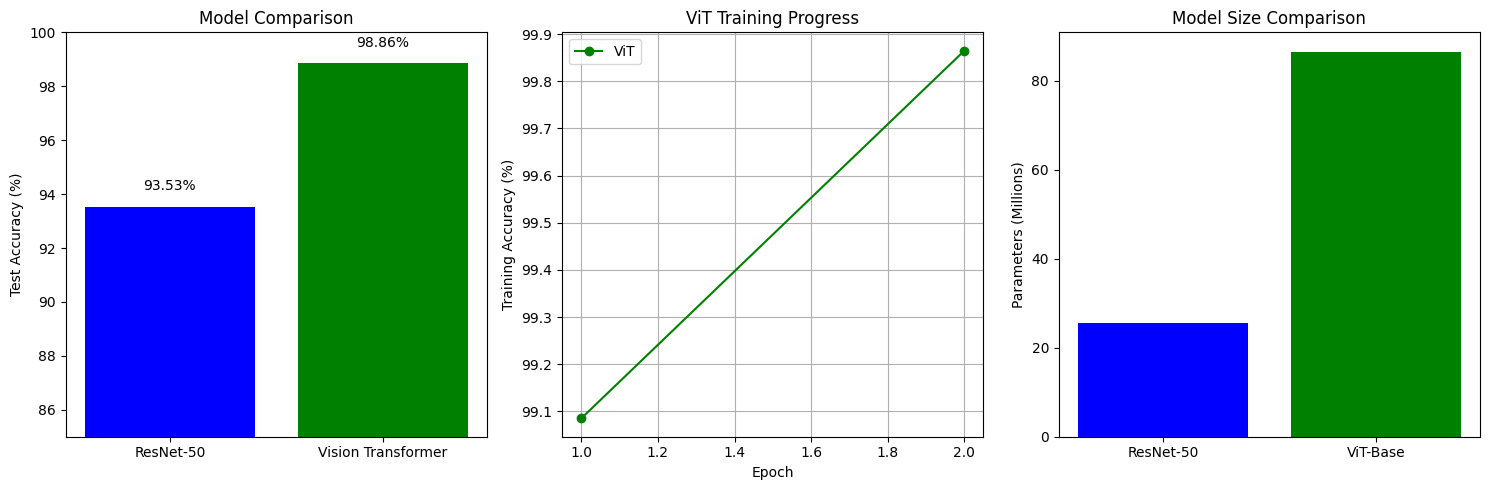

📊 Model comparison visualization complete!


In [10]:
# Step 7: Create comparison visualization
plt.figure(figsize=(15, 5))

# Model comparison
models_comparison = ['ResNet-50', 'Vision Transformer']
accuracies = [93.53, vit_accuracy]

plt.subplot(1, 3, 1)
bars = plt.bar(models_comparison, accuracies, color=['blue', 'green'])
plt.title('Model Comparison')
plt.ylabel('Test Accuracy (%)')
plt.ylim(85, 100)

# Add accuracy labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{acc:.2f}%', ha='center', va='bottom')

# Training progress (if available)
if len(vit_train_accuracies) > 0:
    plt.subplot(1, 3, 2)
    plt.plot(range(1, len(vit_train_accuracies) + 1), vit_train_accuracies, 'g-o', label='ViT')
    plt.title('ViT Training Progress')
    plt.xlabel('Epoch')
    plt.ylabel('Training Accuracy (%)')
    plt.grid(True)
    plt.legend()

# Model complexity comparison
plt.subplot(1, 3, 3)
model_sizes = ['ResNet-50', 'ViT-Base']
param_counts = [25.6, 86.6]  # Million parameters
plt.bar(model_sizes, param_counts, color=['blue', 'green'])
plt.title('Model Size Comparison')
plt.ylabel('Parameters (Millions)')

plt.tight_layout()
plt.show()

print("📊 Model comparison visualization complete!")
